In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("framingham.csv")

feature_cols = ["age", "totChol"] 

df_cleaned = df.dropna()

X_train = df_cleaned[feature_cols].values  # Converts to a NumPy array
y_train = df_cleaned["TenYearCHD"].values  # Converts target column to NumPy array

In [3]:
def normalize(X):
    min_value = X.min(axis=0)
    max_value = X.max(axis=0)

    return (X - min_value) / (max_value - min_value)

In [4]:
X_train = normalize(X_train)

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def compute_cost(X, y, w, b, *argv):
    m = X.shape[0]
    cost = 0
    epsilon = 1e-10  # Small constant to prevent log(0)

    for i in range(m):
        z_wb_x_i = np.dot(X[i], w) + b

        f_wb_i = sigmoid(z_wb_x_i)

        f_wb_i = np.clip(f_wb_i, epsilon, 1 - epsilon)

        loss = -y[i] * np.log(f_wb_i) - ((1 - y[i]) * np.log(1 - f_wb_i))
        cost += loss

    cost = cost / m

    return cost

In [7]:
def compute_gradient(X, y, w, b, *argv):
    m,n = X.shape

    dj_dw = np.zeros((n,))
    dj_db = 0.


    for i in range(m):
        z_wb_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_wb_i)
        
        err = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i][j]
            
        dj_db += err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [8]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_ = 1):
    w = w_in.copy()
    b = b_in

    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b, lambda_)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(X, y, w, b, lambda_)
        J_history.append(cost)

        if i % 100 == 0:
            print(cost)

    return w, b, J_history

In [9]:
w_in = np.zeros(X_train.shape[1])
b_in = 1
alpha = 0.0001

w, b, J_history =gradient_descent(X_train, y_train, w_in, b_in, compute_cost, compute_gradient, alpha, 1000)

print(w, b)
# print(compute_cost(X_train, y_train, w, b))

1.1608676468989132
1.1567039995485386


KeyboardInterrupt: 

In [10]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    cost = compute_cost(X, y, w, b)

    m,n = X.shape
    reg_cost = 0.
    for j in range(n):
        reg_cost += w[j] ** 2

    reg_cost = reg_cost * (lambda_ / (2 * m))

    total_cost = cost + reg_cost
    return total_cost

In [11]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1):
    dj_dw, dj_db = compute_gradient(X, y, w, b)

    m, n = X.shape

    for j in range(n):
        dj_dw[j] += (lambda_ / m) * w[j]

    return dj_dw, dj_db

In [37]:
# w_in = np.array([0.2, 0.1])
# b_in = 0.1
w_in = np.zeros(X_train.shape[1])
# b_in = 0.
b_in = 0
alpha = 1
lambda_ = 0.1
w, b, J_history =gradient_descent(X_train, y_train, w_in, b_in, compute_cost_reg, compute_gradient_reg, alpha, 1000, lambda_)

print(w, b)
# print(compute_cost(X_train, y_train, w, b))
# print(compute_cost_reg(X_train, y_train, w, b))

0.5685040105987316
0.4136600906239425
0.40466002030007814
0.40141801232134994
0.40015321816436084
0.3996155792363251
0.3993619474006816
0.39922616818723516
0.39914308162629214
0.3990860235983999
[2.85378553 0.53512968] -3.3164312463926646


In [41]:
def predict(X, w, b):
    m = X.shape[0]
    p = np.zeros((m,))


    for i in range(m):
        z_wb_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_wb_i)

        if f_wb_i >= 0.5:
            print(f_wb_i)
            p[i] = 1
        else:
            p[i] = 0

    return p

    

In [42]:
def compare_with_actual_values(p, y):
    m = p.shape[0]

    y_length = y.shape[0]
    got_correct = 0
    for i in range(m):
        # print(p[i])
        if p[i] == y[i]:
            got_correct += 1
        # else:
            # print(p[i], y[i])

    return f"Number of examples: {y_length}, got correct: {got_correct}."

In [43]:
p = predict(X_train, w, b)
print(compare_with_actual_values(p, y_train))

Number of examples: 3656, got correct: 3099.


In [19]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

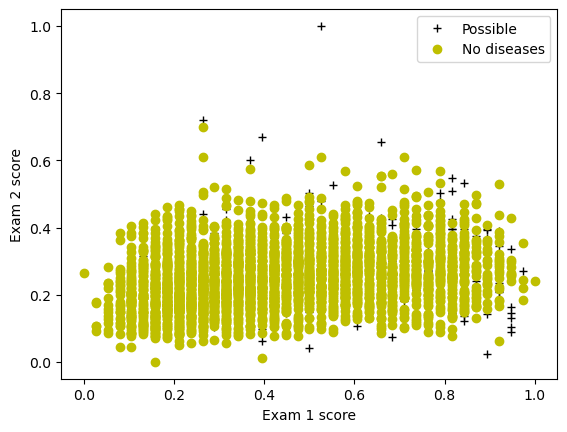

In [20]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Possible", neg_label="No diseases")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [ ]:
def plot_decision_boundary(w, b, X, y):
    # Plot data points
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0', c='r', marker='x')
    plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1', c='g', marker='o')

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
    x_values = np.linspace(x_min, x_max, 100)
    y_values = -(w[0] * x_values + b) / w[1]

    plt.plot(x_values, y_values, label='Decision Boundary', color='blue')
    plt.xlim(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    plt.ylim(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.title('Decision Boundary')
    plt.show()
